## CNN for Image Classification

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
base_path = '/content/gdrive/My Drive/Casting Dataset/'

In [ ]:
train_path = base_path + 'Train/'
test_path = base_path + 'Test/'

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255, 
                               zoom_range=0.1, 
                               brightness_range=[0.9,1.0],
                               validation_split = 0.2)

In [ ]:
image_shape = (300,300,1)
batch_size = 32

train_set = image_gen.flow_from_directory(train_path,
                                            target_size=image_shape[:2],
                                            color_mode="grayscale",
                                            classes={'Train_Abnormal': 0, 'Train_Normal': 1},
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            subset='training',
                                            shuffle=True,
                                            seed=0)

validation_set = image_gen.flow_from_directory(train_path,
                                            target_size=image_shape[:2],
                                            color_mode="grayscale",
                                            classes={'Train_Abnormal': 0, 'Train_Normal': 1},
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            subset='validation',
                                            shuffle=True,
                                            seed=0)

test_set = image_gen.flow_from_directory(test_path,
                                           target_size=image_shape[:2],
                                           color_mode="grayscale",
                                           classes={'Test_Abnormal': 0, 'Test_Normal': 1},
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           shuffle=False,
                                           seed=0)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'Train_Abnormal': 0, 'Train_Normal': 1}

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(7,7), strides=2, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=224, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
n_epochs = 20
history = model.fit_generator(train_set, epochs= n_epochs, validation_data=validation_set, verbose = 1)

<ipython-input-10-b2b08055bd41>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, epochs= n_epochs, validation_data=validation_set, verbose = 1)


Epoch 1/20
25/25 [==============================] - 124s 5s/step - loss: 0.7404 - accuracy: 0.5163 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 43s 2s/step - loss: 0.6690 - accuracy: 0.5962 - val_loss: 0.6390 - val_accuracy: 0.6600
Epoch 3/20
25/25 [==============================] - 48s 2s/step - loss: 0.6170 - accuracy: 0.6388 - val_loss: 0.6007 - val_accuracy: 0.6750
Epoch 4/20
25/25 [==============================] - 42s 2s/step - loss: 0.5636 - accuracy: 0.7200 - val_loss: 0.6286 - val_accuracy: 0.6200
Epoch 5/20
25/25 [==============================] - 42s 2s/step - loss: 0.5113 - accuracy: 0.7475 - val_loss: 0.5064 - val_accuracy: 0.7550
Epoch 6/20
25/25 [==============================] - 42s 2s/step - loss: 0.5503 - accuracy: 0.7088 - val_loss: 0.5495 - val_accuracy: 0.7400
Epoch 7/20
25/25 [==============================] - 63s 3s/step - loss: 0.4941 - accuracy: 0.7713 - val_loss: 0.5358 - val_accuracy: 0.7400
Epoch 8/20
25/25 [=

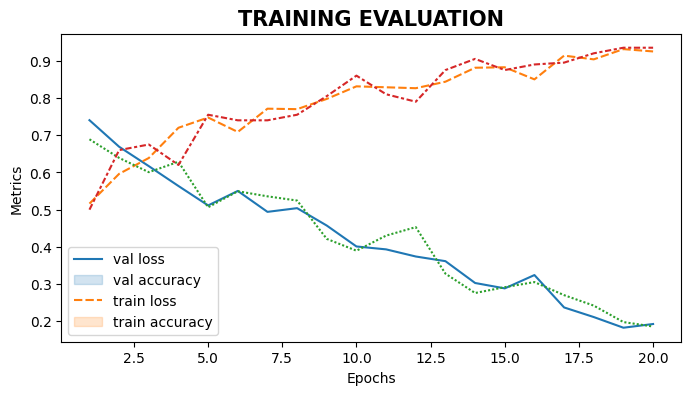

In [ ]:
plt.subplots(figsize = (8, 4))
sns.lineplot(data = pd.DataFrame(model.history.history,
                                 index = range(1, 1+len(model.history.epoch))))
plt.title("TRAINING EVALUATION", fontweight = "bold", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel("Metrics")

plt.legend(labels = ['val loss', 'val accuracy', 'train loss', 'train accuracy'])
plt.show()

1/1 [==============================] - 1s 753ms/step


<ipython-input-12-9d17933a5443>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze((model.predict(test_set) >= 0.5).astype(np.int))


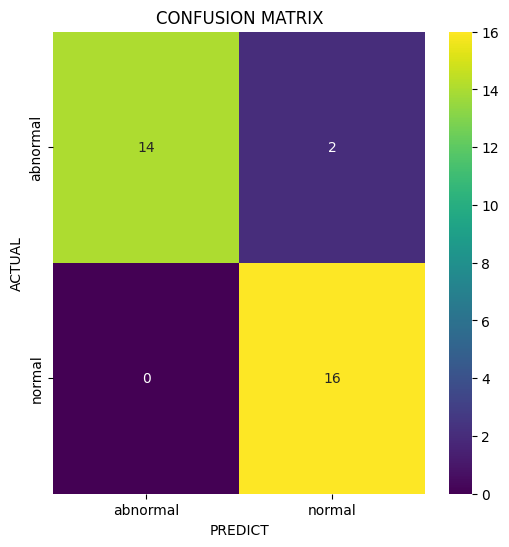

<Figure size 640x480 with 0 Axes>

In [ ]:
y_pred = np.squeeze((model.predict(test_set) >= 0.5).astype(np.int))
cm = confusion_matrix(test_set.labels, y_pred)
# Plot confusion matrix.
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt= 'g', vmin=0, cmap='viridis')
plt.xticks(ticks=np.arange(2) + 0.5, labels=["abnormal", "normal"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["abnormal", "normal"])
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()
plt.savefig('Confusion Matrix.png')

1/1 [==============================] - 0s 38ms/step


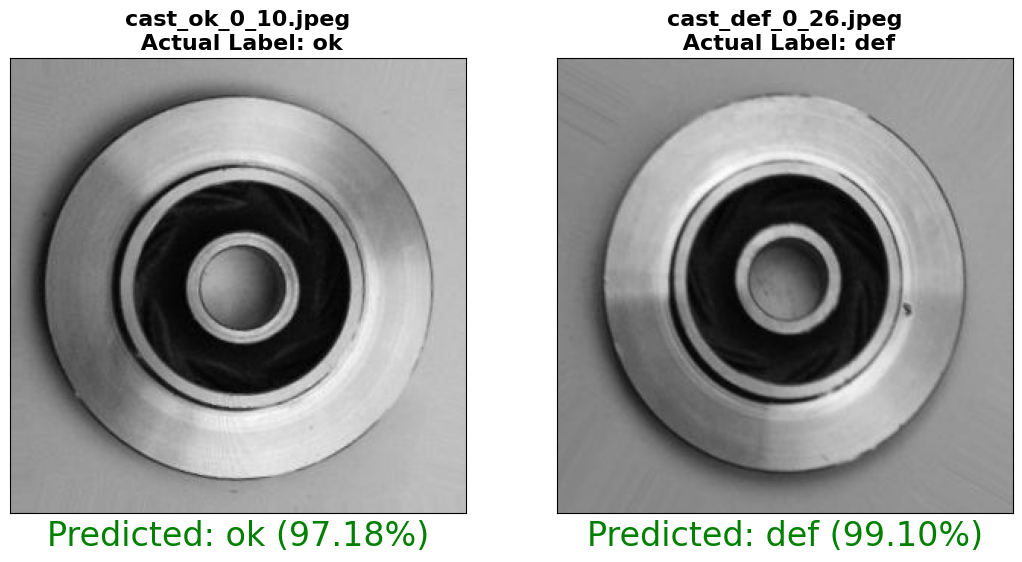

In [ ]:
test_cases = ['Test_Normal/cast_ok_0_10.jpeg', 'Test_Abnormal/cast_def_0_26.jpeg']
image_shape = (300,300,1)

plt.figure(figsize=(20,8))
for i in range(len(test_cases)):
    img_pred = cv2.imread(test_path + test_cases[i], cv2.IMREAD_GRAYSCALE)
    img_pred = img_pred / 255 # rescale
    prediction = model.predict(img_pred.reshape(1, *image_shape))
    
    img = cv2.imread(test_path + test_cases[i])
    label = test_cases[i].split("_")[2]
    
    plt.subplot(1, 3, i+1)
    plt.title(f"{test_cases[i].split('/')[1]}\n Actual Label: {label}", weight='bold', size=16)
    # Predicted Class : defect
    if (prediction < 0.5):
        predicted_label = "Abnormal"
        prob = (1-prediction.sum()) * 100
    # Predicted Class : OK
    else:
        predicted_label = "Normal"
        prob = prediction.sum() * 100    
    plt.xlabel(f'Predicted: {predicted_label} ({prob:.2f}%)', color= 'g', size=24)
    plt.imshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.savefig('correct_class_img.png', dpi=500, bbox_inches='tight')
plt.show()